<a href="https://colab.research.google.com/github/emmab-collab/PyTorch/blob/main/PyTorch_CNN_Digestive_Biopsy_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install medmnist

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader

from medmnist import INFO, PathMNIST

# **1. Preparing the data**

In [ ]:
from torchvision.transforms import ToTensor, Normalize, Compose

In [ ]:
transform = Compose([
    ToTensor(),
    Normalize((0.5,), (0.5,))  # normalise en centrant autour de 0, en divisant par 0.5 (par exemple)
])

train_dataset = PathMNIST(split='train', download=True, transform=transform)
val_dataset = PathMNIST(split='val', download=True, transform=transform)
test_dataset = PathMNIST(split='test', download=True, transform=transform)

100%|██████████| 206M/206M [00:17<00:00, 12.0MB/s] 


In [ ]:
len(train_dataset)

89996

In [ ]:
repartition=torch.bincount(torch.tensor(train_dataset.labels.squeeze())).tolist()

In [ ]:
repartition/np.sum(repartition)

array([0.10407129, 0.10566025, 0.11511623, 0.1155718 , 0.08895951,
       0.13536157, 0.08762612, 0.1044602 , 0.14317303])

In [ ]:
train_dataset

Dataset PathMNIST of size 28 (pathmnist)
    Number of datapoints: 89996
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-HE-100K

In [ ]:
img,label=train_dataset[0]
print(img.shape,label)
img

torch.Size([3, 28, 28]) [0]


tensor([[[0.7255, 0.7176, 0.7255,  ..., 0.7255, 0.7176, 0.7333],
         [0.7098, 0.7255, 0.7176,  ..., 0.5451, 0.5059, 0.4902],
         [0.7255, 0.7255, 0.7176,  ..., 0.6314, 0.6235, 0.6392],
         ...,
         [0.7098, 0.7020, 0.7333,  ..., 0.7333, 0.7255, 0.7333],
         [0.6706, 0.7020, 0.7333,  ..., 0.7333, 0.7333, 0.7333],
         [0.6863, 0.7255, 0.7333,  ..., 0.7255, 0.7333, 0.7412]],

        [[0.6314, 0.6235, 0.6235,  ..., 0.6314, 0.6235, 0.6314],
         [0.6157, 0.6235, 0.6157,  ..., 0.3882, 0.3490, 0.3176],
         [0.6314, 0.6235, 0.6078,  ..., 0.4980, 0.5059, 0.5216],
         ...,
         [0.6078, 0.5765, 0.6314,  ..., 0.6314, 0.6314, 0.6392],
         [0.5059, 0.5686, 0.6314,  ..., 0.6314, 0.6392, 0.6314],
         [0.5294, 0.6235, 0.6314,  ..., 0.6314, 0.6314, 0.6392]],

        [[0.7804, 0.7804, 0.7804,  ..., 0.7804, 0.7804, 0.7804],
         [0.7725, 0.7725, 0.7725,  ..., 0.5843, 0.5451, 0.5294],
         [0.7725, 0.7725, 0.7647,  ..., 0.6706, 0.6706, 0.

In [ ]:
batch_size=100


train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dl = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
data_flag = 'pathmnist'
info = INFO[data_flag]
labels = info['label']
print(f"Les labels: \n{labels}\n")

Les labels: 
{'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}



In [ ]:
labels['0']

'adipose'

In [ ]:
num_classes = len(labels)
print(f"Nombre de classes : {num_classes}")

Nombre de classes : 9


# **2. Visualising images**

In [ ]:
import matplotlib.pyplot as plt
#on change les tensor to 32*32*3
#parce que dans matplotlib la dim de la couleur est à droite

def show_example(img,label):
    print(f'Label: {labels[str(label[0])]}')
    plt.imshow(img.permute(1,2,0))

Label: adipose


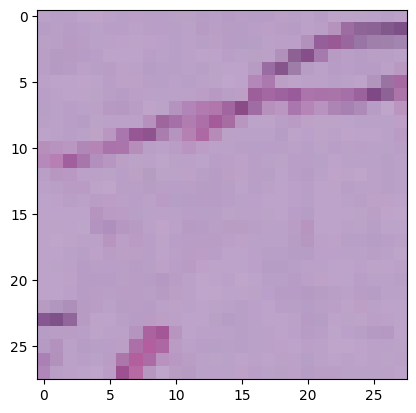

In [ ]:
show_example(*train_dataset[0])

Label: mucus


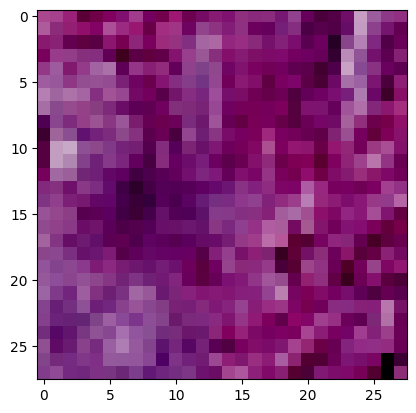

In [ ]:
show_example(*train_dataset[1099])

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images,labels in dl:
        fig,ax=plt.subplots(figsize=(10,10))
        ax.set_xticks([]);ax.set_yticks([])
        ax.imshow(make_grid(images,10).permute(1,2,0))
        break

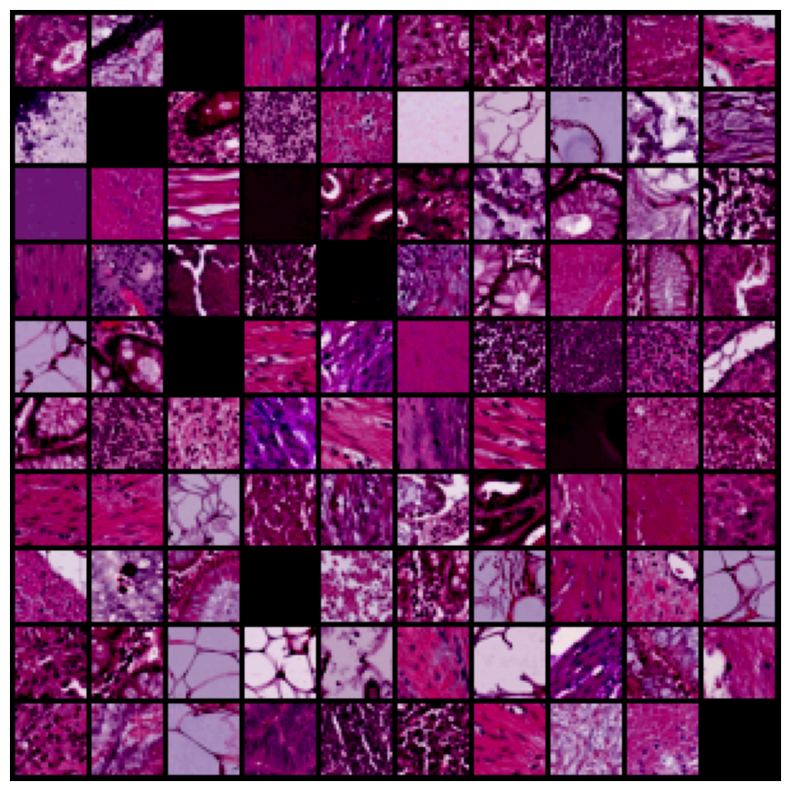

In [ ]:
show_batch(train_dl)

# **3. Defining the Model (Convolutional Neural Network)**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

## **1. Exemple de modèle simple**

In [ ]:
simple_model=nn.Sequential(
    nn.Conv2d(3,9,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)
)

In [ ]:
for images,labels in train_dl:
    print(f'images.shape: {images.shape}')
    out=simple_model(images)
    print(f'out.shape: {out.shape}')
    break

images.shape: torch.Size([100, 3, 28, 28])
out.shape: torch.Size([100, 9, 14, 14])


## **2. Modèle complexe**

Comment on choisit ``kernel_size`` : pour la 1ere couche, on prend la valeur du input.

In [ ]:
model=nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output : batch_size x 16 x 14 x 14

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output : bs x 16 x 7 x 7

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output : bs x 16 x 3 x 3

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output : bs x 16 x 1 x 1

    nn.Flatten(), #output : bs x 16
    nn.Linear(16,9) #output : bs x 9
)

In [ ]:
model[0].weight.shape
model[3].weight.shape

torch.Size([16, 16, 3, 3])

In [ ]:
for images,labels in train_dl:
    print(f'images.shape: {images.shape}')
    out=model(images)
    print(f'out.shape: {out.shape}')
    print(f'out[0]: {out[0]}')
    break

images.shape: torch.Size([100, 3, 28, 28])
out.shape: torch.Size([100, 9])
out[0]: tensor([-0.0106,  0.1905,  0.0417,  0.0035, -0.0456, -0.1149, -0.2614, -0.0082,
         0.0671], grad_fn=<SelectBackward0>)


# **4. Using a GPU**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def to_device(data,device):
    if isinstance(data,(list,tuple)): #si notre dataset est une liste ou tuple
        return [to_device(x,device)for x in data]
    return data.to(device,non_blocking=True)



class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b,self.device) #ca genere le batch sans repetition

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device

device(type='cuda')

In [ ]:
train_dl=DeviceDataLoader(train_dl,device)
val_dl=DeviceDataLoader(val_dl,device)
to_device(model,device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=16, out_features=9, bias=True)
)

# **5. Defining functions**

In [ ]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):

    #generate predictions
    preds=model(xb)
    #calculate loss
    yb=yb.reshape(-1)
    loss=loss_func(preds,yb)

    if opt is not None:
        #compute gradients
        loss.backward()
        #update parameters
        opt.step()
        #reset gradients
        opt.zero_grad()

    metric_result=None
    if metric is not None:
        #compute the metric
        metric_result=metric(preds,yb)


    return loss.item(),len(xb),metric_result

In [ ]:
def evaluate(model,loss_fn,val_dl,metric=None):
    with torch.no_grad():
        #pass each batch through the model
        results=[loss_batch(model,loss_fn,xb,yb.reshape(-1),metric=metric)
                for xb,yb in val_dl]
        #separate losses,counts and metrics
        losses,nums,metrics=zip(*results)
        #total size of the dataset
        total=np.sum(nums)
        #avg loss across batches
        avg_loss=np.sum(np.multiply(losses,nums))/total
        avg_metric=None
        if metric is not None:
            #avg of metric across batches
            avg_metric=np.sum(np.multiply(metrics,nums))/total

    return avg_loss,total,avg_metric

In [ ]:
def fit(epochs,model,loss_fn,train_dl,val_dl,
        opt_fn=None,lr=None,metric=None):
    train_losses,val_losses,val_metrics=[],[],[]

    #instantiate the optimizer
    if opt_fn is None:
        opt_fn=torch.optim.SGD
    opt=opt_fn(model.parameters(),lr=lr)

    for epoch in range(epochs):
        #training
        model.train() #setting de pytorch où on indique train
        for xb,yb in train_dl:
            #on fait une gradient descent pour tous les batchs 1 epoch
            train_loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)

        #evaluation pour 1 epoch
        model.eval()
        result=evaluate(model,loss_fn,val_dl,metric)

        val_loss,total,val_metric=result

        #record the loss and metric pour 1 epoch
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)

        #print progress
        if metric is None:
            print(f'Epoch [{epoch+1} / {epochs}],train_loss:{train_loss:.4f}, val_loss:{val_loss:.4f}')
        else:
            print(f'Epoch [{epoch+1} / {epochs}],train_loss:{train_loss:.4f}, val_loss:{val_loss:.4f},val_{metric.__name__} : {val_metric:.4f}')

    return train_losses,val_losses,val_metrics

In [ ]:
def accuracy(outputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [ ]:
val_loss,_,val_acc=evaluate(model,F.cross_entropy,val_dl,metric=accuracy)
print(f'Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}')

Loss: 2.1974, Accuracy: 0.1057


# **6. Training the model**

In [ ]:
num_epochs=10
opt_fn=torch.optim.Adam
lr=0.005

In [ ]:
history=fit(num_epochs,model,F.cross_entropy,train_dl,val_dl,
        opt_fn,lr,accuracy)
train_losses,val_losses,val_metrics=history

Epoch [1 / 10],train_loss:0.7601, val_loss:0.8056,val_accuracy : 0.6976
Epoch [2 / 10],train_loss:0.5362, val_loss:0.6064,val_accuracy : 0.7807
Epoch [3 / 10],train_loss:0.4559, val_loss:0.4643,val_accuracy : 0.8343
Epoch [4 / 10],train_loss:0.3440, val_loss:0.5009,val_accuracy : 0.8188
Epoch [5 / 10],train_loss:0.5214, val_loss:0.4202,val_accuracy : 0.8508
Epoch [6 / 10],train_loss:0.3358, val_loss:0.4447,val_accuracy : 0.8454
Epoch [7 / 10],train_loss:0.3466, val_loss:0.4014,val_accuracy : 0.8553
Epoch [8 / 10],train_loss:0.3144, val_loss:0.4189,val_accuracy : 0.8492
Epoch [9 / 10],train_loss:0.3544, val_loss:0.3866,val_accuracy : 0.8654
Epoch [10 / 10],train_loss:0.3703, val_loss:0.4493,val_accuracy : 0.8393


In [ ]:
num_epochs=10
opt_fn=torch.optim.Adam
lr=0.0001

In [ ]:
history2=fit(num_epochs,model,F.cross_entropy,train_dl,val_dl,
        opt_fn,lr,accuracy)
train_losses2,val_losses2,val_metrics2=history2

Epoch [1 / 10],train_loss:0.2070, val_loss:0.3092,val_accuracy : 0.8910
Epoch [2 / 10],train_loss:0.2908, val_loss:0.3039,val_accuracy : 0.8941
Epoch [3 / 10],train_loss:0.2247, val_loss:0.3012,val_accuracy : 0.8970
Epoch [4 / 10],train_loss:0.2969, val_loss:0.3012,val_accuracy : 0.8968
Epoch [5 / 10],train_loss:0.2183, val_loss:0.2989,val_accuracy : 0.8982
Epoch [6 / 10],train_loss:0.3630, val_loss:0.2974,val_accuracy : 0.8976
Epoch [7 / 10],train_loss:0.1894, val_loss:0.2977,val_accuracy : 0.8982
Epoch [8 / 10],train_loss:0.3522, val_loss:0.2963,val_accuracy : 0.8969
Epoch [9 / 10],train_loss:0.3705, val_loss:0.2953,val_accuracy : 0.8975
Epoch [10 / 10],train_loss:0.2212, val_loss:0.2954,val_accuracy : 0.8963


In [ ]:
def plot_metric(metric_values):
    plt.plot(metric_values,'-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

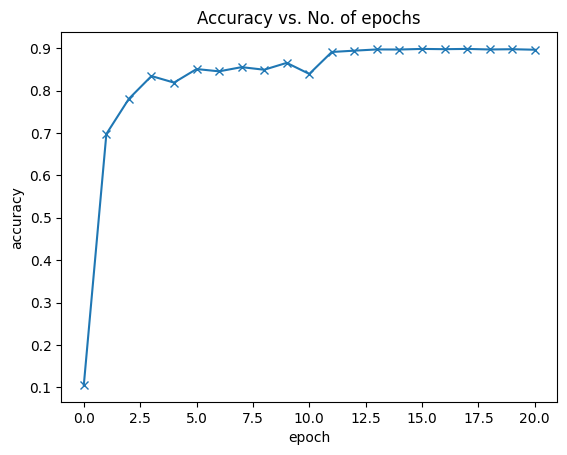

In [ ]:
plot_metric([val_acc]+val_metrics+val_metrics2)

In [ ]:
def plot_losses(train_losses,val_losses):
    plt.plot(train_losses,'-x')
    plt.plot(val_losses,'-o')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training','Validation'])
    plt.title('Loss vs. No. of epochs')

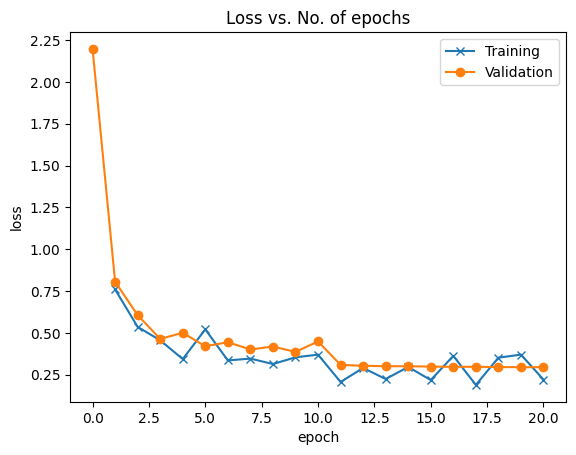

In [ ]:
plot_losses([None]+train_losses+train_losses2,[val_loss]+val_losses+val_losses2)

# **7. Testing with individual images**

In [ ]:
labels = info['label']

In [ ]:
def predict_image(img,model):
    #convert the image to a batch of 1 image
    xb=img.unsqueeze(0)
    #get predictions from model
    yb=model(xb.to(device))
    #pick index with highest probability
    _,preds=torch.max(yb,dim=1) #on recoit l'index
    #retrieve the class label
    return labels[str(preds[0].item())]

Label : mucus, Predicted : mucus


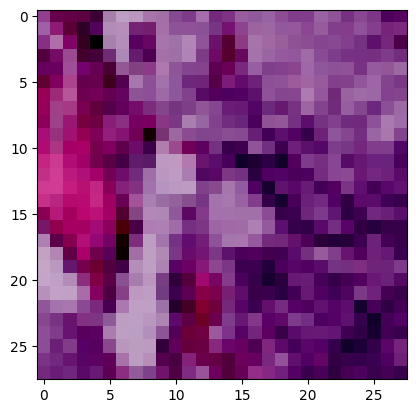

In [ ]:
img,label=test_dataset[1]
plt.imshow(img.permute(1,2,0))
print(f'Label : {labels[str(label[0].item())]}, Predicted : {predict_image(img,model)}')

Label : adipose, Predicted : smooth muscle


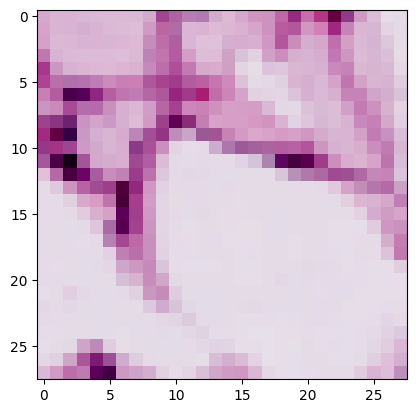

In [ ]:
img,label=test_dataset[111]
plt.imshow(img.permute(1,2,0))
print(f'Label : {labels[str(label[0].item())]}, Predicted : {predict_image(img,model)}')

Label : normal colon mucosa, Predicted : normal colon mucosa


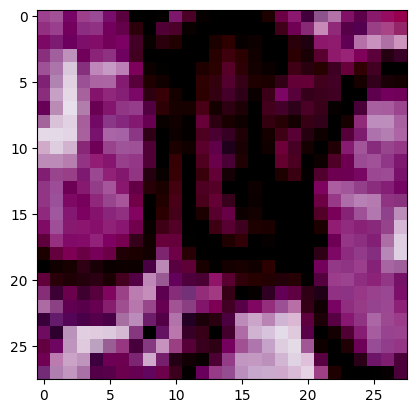

In [ ]:
img,label=test_dataset[13]
plt.imshow(img.permute(1,2,0))
print(f'Label : {labels[str(label[0].item())]}, Predicted : {predict_image(img,model)}')

In [ ]:
test_dl=DeviceDataLoader(test_dl,device)

test_loss,_,test_acc=evaluate(model,F.cross_entropy,test_dl,metric=accuracy)
print(f'Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}')

Loss: 0.6562, Accuracy: 0.8260


# torch.bincount(torch.tensor(train_dataset.labels.squeeze())).tolist()**8. Conclusion and save the model**

Alors qu'avec un ``DNN (Deep Neural Network)`` on n'atteignait pas plus de ``40% d'accuracy``,

On a atteint ``83% d'accuracy`` sur le test_set et ``90% d'accuracy`` sur le val_set avec un ``CNN (convolutional neural network)``.

On a un bon validation_set et puisque notre accuracy sur le test_dl est proche de notre accuracy sur le val_dl

In [ ]:
torch.save(model.state_dict(),'DigestiveBiopsy-cnn.pth')